# Web scrapping assignment -[3]

## Name- Ranjan Pratap Singh                                                      DS2307

In [1]:
!pip install selenium

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import selenium 
import pandas as pd
import numpy as np
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

### 1. Write a python program which searches all the product under a particular product from www.amazon.in. The product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars.

In [2]:
driver = webdriver.Chrome()

In [3]:
driver.get('https://www.amazon.in/')
driver.maximize_window() 

In [4]:
search =driver.find_element(By.XPATH,'/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input')
search.send_keys(input('Enter Product Name:- '))

Enter Product Name:- jacket


In [5]:
search_button = driver.find_element(By.XPATH,'/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input')
search_button.click()

### 2. In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then scrape all the products available under that product name. Details to be scraped are: "Brand
#### Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and
#### “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.

In [6]:
 product_url=[]

In [7]:
for page in range(0,2):
    url = driver.find_elements(By.XPATH,'//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')
    for i in url:
        product_url.append(i.get_attribute("href"))
    next_button = driver.find_element(By.XPATH,'//a[@class="s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"]')
    next_button.click()
    time.sleep(5)
    

                                

In [8]:
len(product_url)

133

In [11]:
Brand_Name=[]
Name_of_Product=[]
Price=[]
Return_Exchange=[]
Expected_Delivery=[]
Availability=[]


for url in product_url:
    driver.get(url)

    
    try:                         
        brand= driver.find_element(By.XPATH,'//*[@id="bylineInfo"]').text 
        Brand_Name.append(brand)
    
    except NoSuchElementException as e:
         Brand_Name.append('-')
            
            
    
    try:     
        product= driver.find_element(By.XPATH,'//span[@class="a-size-large product-title-word-break"]')
        Name_of_Product.append(product.text)
    
    except NoSuchElementException as e:
         Name_of_Product.append('-')
            
            
            
    try:   
        product_price= driver.find_element(By.XPATH,'//span[@class="a-price aok-align-center reinventPricePriceToPayMargin priceToPay"]')
        Price.append(product_price.text)
    
    except NoSuchElementException as e:
         Price.append('-')
    
    try:   
        delivery= driver.find_element(By.XPATH,'//*[@id="mir-layout-DELIVERY_BLOCK-slot-PRIMARY_DELIVERY_MESSAGE_LARGE"]')
        Expected_Delivery.append(delivery.text)
    
    except NoSuchElementException as e:
         Expected_Delivery.append('-')
              
                
    try:   
        exchange= driver.find_element(By.XPATH,'//*[@id="RETURNS_POLICY"]/span/div[2]/span')
        Return_Exchange.append(exchange.text)
    
    except NoSuchElementException as e:
         Return_Exchange.append('-')
            
            
    try:   
        avail= driver.find_element(By.XPATH,'//div[@id="availability"]')  
        Availability.append(avail.text)
    
    except NoSuchElementException as e:
         Availability.append('-')

In [12]:
df=pd.DataFrame({'Brand':Brand_Name,'ReturnExchange':Return_Exchange,'Price':Price,'Delivery_by':Expected_Delivery,'Name of Product':Name_of_Product,'Availability of product':Availability,'urls':product_url})
df

,Brand,ReturnExchange,Price,Delivery_by,Name of Product,Availability of product,urls
0,Brand: BLUE TYGA,10 days Return & Exchange,"₹1,499","FREE delivery Monday, 11 September. Details",BLUE TYGA SUNSCREEN JACKET Men's Travel Nylon ...,In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1,Visit the Campus Sutra Store,10 days Return & Exchange,"₹1,199","FREE delivery Wednesday, 6 September. Details",Campus Sutra Men Bomber Jacket Hoodie,In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,Visit the BE SAVAGE Store,10 days Return & Exchange,₹797,"FREE delivery Tomorrow, 3 September. Order wit...",BE SAVAGE Letterman Unisex Varsity Jacket Black,In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
3,Visit the OJASS Store,10 days Return & Exchange,₹644,"FREE delivery Wednesday, 6 September. Details",OJASS Men's Quilted Solid Bomber Jacket Winter...,In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
4,Brand: VOXATI,10 days Return & Exchange,₹938\n50,"FREE delivery Wednesday, 6 September. Details",VOXATI Men's Denim Jacket,In stock,https://www.amazon.in/VOXATI-Mens-Denim-Jacket...
...,...,...,...,...,...,...,...
128,Visit the TriPole Store,10 days Return & Exchange,"₹1,399","FREE delivery Tuesday, 5 September. Details",TriPole Men's Solid Jacket,Only 1 left in stock,https://www.amazon.in/Tripole-Jacket-Trekking-...
129,Visit the Leather Retail Store,10 days Return & Exchange,"₹1,614","FREE delivery Wednesday, 6 September. Details",Leather Retail® Woman Faux Leather Full Sleeve...,In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
130,Visit the Leather Retail Store,10 days Return & Exchange,"₹1,614","FREE delivery Wednesday, 6 September. Details",Leather Retail® Woman Faux Leather Full Sleeve...,In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
131,Visit the BE SAVAGE Store,10 days Return & Exchange,₹797,"FREE delivery Tomorrow, 3 September. Order wit...",BE SAVAGE Letterman Unisex Varsity Jacket Black,In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...


In [13]:
df.to_csv('Jackets.csv')

### 3. Write a python program to access the search bar and search button on images.google.com and scrape 10 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.

In [141]:
driver = webdriver.Chrome()

In [173]:

driver.get('https://images.google.com/')
driver.maximize_window()

In [174]:
user_search = driver.find_element(By.XPATH, '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')
user_search.send_keys('fruits')

In [175]:
srch_btn = driver.find_element(By.XPATH, '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button')
srch_btn.click()

In [177]:
FRUITS = []

for i in driver.find_elements(By.XPATH, '//img[@class="rg_i Q4LuWd"]'):
    FRUITS.append(i.get_attribute('src'))
FRUITS = FRUITS[:10]

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
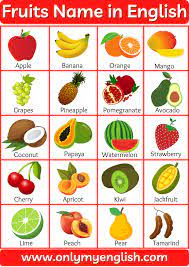
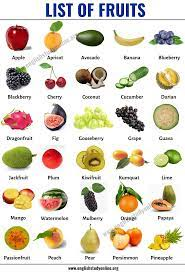
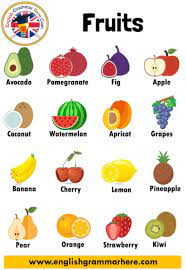
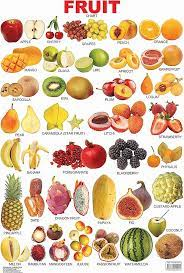
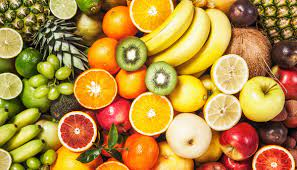
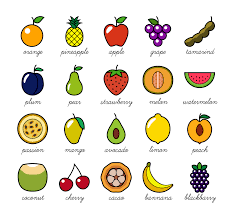
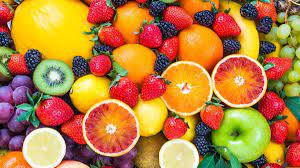
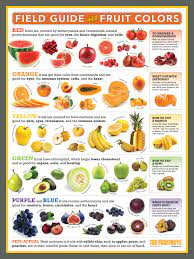
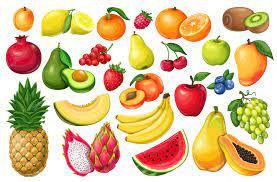
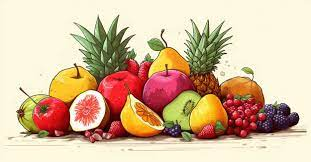

In [179]:
FRUITS

In [180]:
driver.get('https://images.google.com/')


In [181]:
user_search = driver.find_element(By.XPATH, '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')
user_search.send_keys('cars')

In [182]:
srch_btn = driver.find_element(By.XPATH, '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button')
srch_btn.click()

In [183]:
CARS = []


for i in driver.find_elements(By.XPATH, '//img[@class="rg_i Q4LuWd"]'):
    CARS.append(i.get_attribute('src'))
CARS = FRUITS[:10]

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
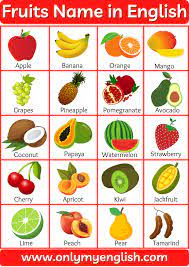
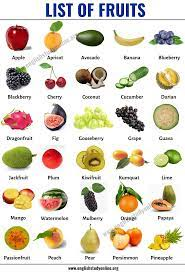
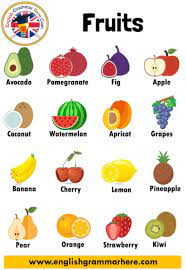
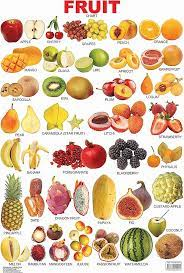
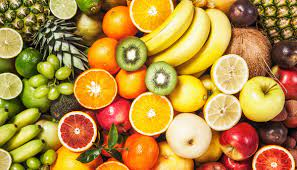
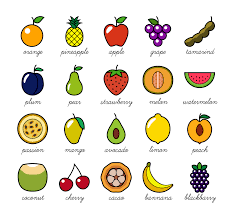
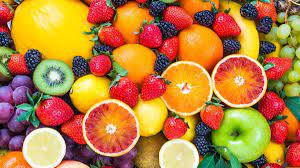
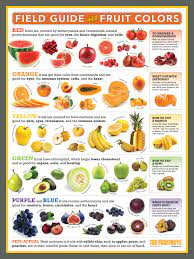
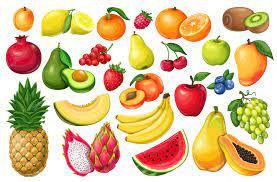
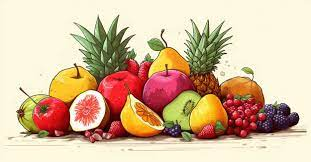

In [184]:
CARS

In [185]:
driver.get('https://images.google.com/')


In [186]:
user_search = driver.find_element(By.XPATH, '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')
user_search.send_keys('machine learning')

In [187]:
srch_btn = driver.find_element(By.XPATH, '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button')
srch_btn.click()

In [188]:
MACHINE_LEARNING = []

for i in driver.find_elements(By.XPATH, '//img[@class="rg_i Q4LuWd"]'):
    MACHINE_LEARNING.append(i.get_attribute('src'))
MACHINE_LEARNING = FRUITS[:10]

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
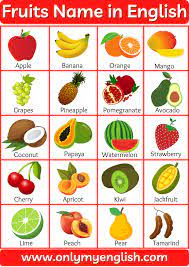
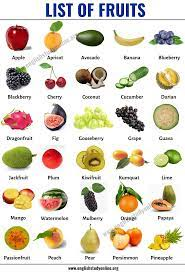
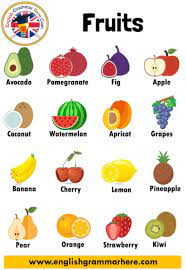
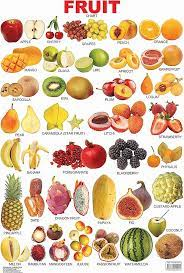
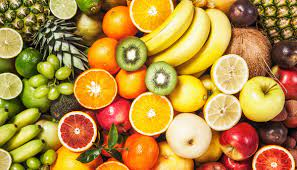
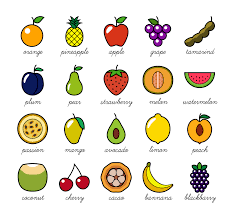
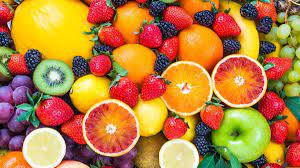
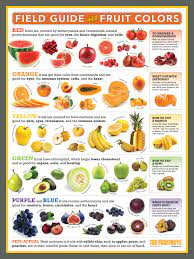
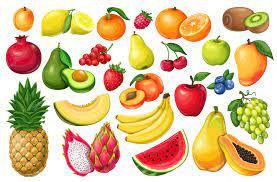
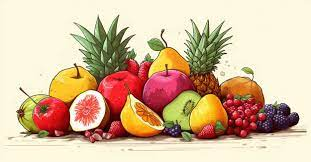

In [189]:
MACHINE_LEARNING

In [190]:
driver.get('https://images.google.com/')

In [191]:
user_search = driver.find_element(By.XPATH, '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')
user_search.send_keys('guitar')

In [192]:
srch_btn = driver.find_element(By.XPATH, '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button')
srch_btn.click()

In [193]:
GUITAR = []
for i in driver.find_elements(By.XPATH, '//img[@class="rg_i Q4LuWd"]'):
    GUITAR.append(i.get_attribute('src'))
GUITAR = GUITAR[:10]

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
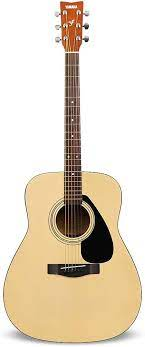
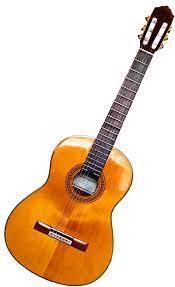
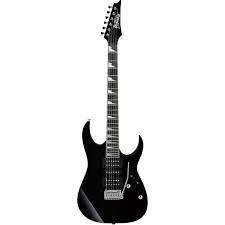
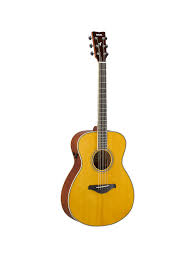
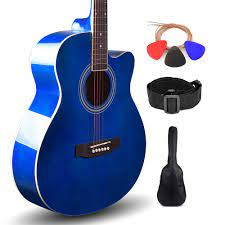
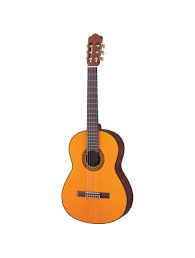
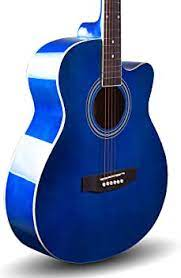
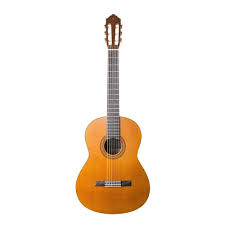
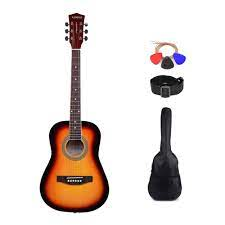
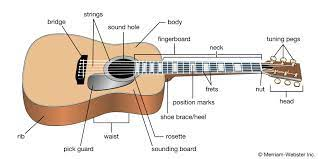

In [194]:
GUITAR

In [195]:
driver.get('https://images.google.com/')

In [196]:
user_search = driver.find_element(By.XPATH, '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')
user_search.send_keys('cakes')

In [197]:
srch_btn = driver.find_element(By.XPATH, '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button')
srch_btn.click()

In [199]:
CAKES = []
for i in driver.find_elements(By.XPATH, '//img[@class="rg_i Q4LuWd"]'):
    CAKES.append(i.get_attribute('src'))
CAKES = GUITAR[:10]

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
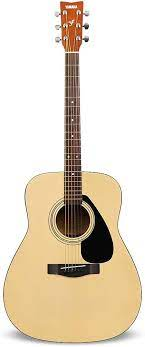
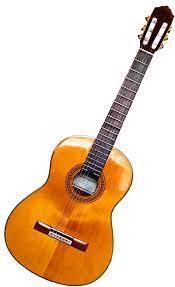
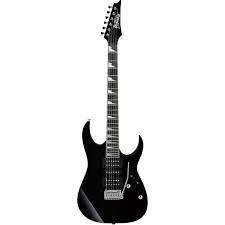
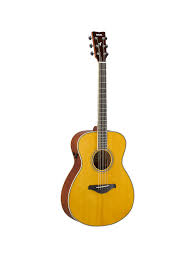
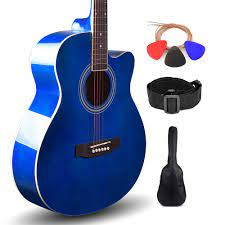
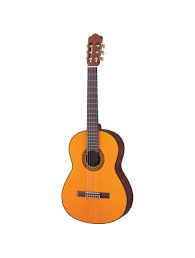
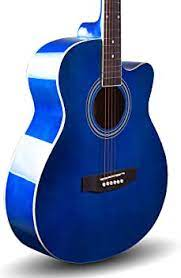
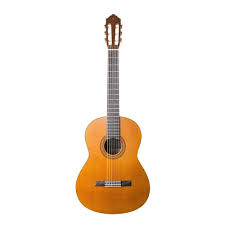
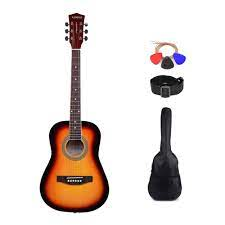
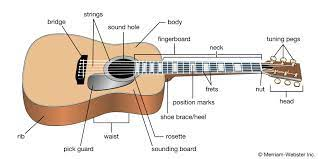

In [200]:
CAKES

### 4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”,
#### “Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.

In [16]:
driver = webdriver.Chrome()

In [17]:
driver.get('https://www.flipkart.com/')
driver.maximize_window() 

In [18]:
search =driver.find_element(By.CLASS_NAME,"_3704LK")
search.send_keys('5g mobiles')

In [19]:
search_button = driver.find_element(By.CLASS_NAME,'L0Z3Pu')
search_button.click()

In [20]:
URL_2 =[]
url = driver.find_elements(By.XPATH,'//a[@class="_1fQZEK"]')
for i in url:
    URL_2.append(i.get_attribute("href"))
    

In [26]:
brandname = []
smartphone = []
colour = []
ram = []
rom = []
pcamera = []
scamera = []
displaysize = []
bcapacity  = []
price = []
url = []

In [27]:
for i in driver.find_elements(By.XPATH, '//div[@class="_3pLy-c row"]/div/div[@class="_4rR01T"]'):
    
    brandname.append(i.text.split(' ')[0])
    
    smartphone.append(i.text.split('(')[0])
 
    colour.append(i.text.split('(')[1].split(',')[0])    

    rom.append(i.text.split('(')[1].split(',')[1].split(')')[0])

In [28]:
camera = []

In [29]:
for i in driver.find_elements(By.XPATH, '//ul[@class="_1xgFaf"]/li[1]'):
    ram.append(i.text.split('|')[0])


In [30]:
for i in driver.find_elements(By.XPATH, '//ul[@class="_1xgFaf"]/li[2]'):
    displaysize.append(i.text)


In [31]:
for i in driver.find_elements(By.XPATH, '//ul[@class="_1xgFaf"]/li[3]'):
    camera.append(i.text)


In [33]:
for i in range(0,24):
    pcamera.append(camera[i].split('|')[0])


In [34]:
for i in range(0,24):
    try:
        scamera.append(camera[i].split('|')[1])
    except:
        scamera.append('-')


In [35]:
for i in driver.find_elements(By.XPATH, '//ul[@class="_1xgFaf"]/li[4]'):
    bcapacity.append(i.text.split('B')[0])

In [36]:
for i in driver.find_elements(By.XPATH, '//div[@class="_25b18c"]/div[@class="_30jeq3 _1_WHN1"]'):
    price.append(i.text)

In [37]:
for i in driver.find_elements(By.XPATH, '//div[@class="_2kHMtA"]/a'):
    url.append(i.get_attribute('href'))

In [38]:
data = pd.DataFrame({'Brand Name':brandname,'Smartphone name':smartphone, 'Colour':colour, 'RAM':ram, 'Storage(ROM)':rom, 'Primary Camera':pcamera, 'Secondary Camera':scamera, 'Display Size':displaysize, 'Battery Capacity':bcapacity, 'Price':price, 'Product URL':url})
data

,Brand Name,Smartphone name,Colour,RAM,Storage(ROM),Primary Camera,Secondary Camera,Display Size,Battery Capacity,Price,Product URL
0,POCO,POCO M6 Pro 5G,Power Black,6 GB RAM,128 GB,50MP + 2MP,8MP Front Camera,17.25 cm (6.79 inch) Full HD+ Display,5000 mAh,"₹12,999",https://www.flipkart.com/poco-m6-pro-5g-power-...
1,POCO,POCO M6 Pro 5G,Power Black,4 GB RAM,64 GB,50MP + 2MP,8MP Front Camera,17.25 cm (6.79 inch) Full HD+ Display,5000 mAh,"₹10,999",https://www.flipkart.com/poco-m6-pro-5g-power-...
2,POCO,POCO M6 Pro 5G,Forest Green,4 GB RAM,64 GB,50MP + 2MP,8MP Front Camera,17.25 cm (6.79 inch) Full HD+ Display,5000 mAh,"₹10,999",https://www.flipkart.com/poco-m6-pro-5g-forest...
3,vivo,vivo T2x 5G,Marine Blue,6 GB RAM,128 GB,50MP + 2MP,8MP Front Camera,16.71 cm (6.58 inch) Full HD+ Display,5000 mAh,"₹13,999",https://www.flipkart.com/vivo-t2x-5g-marine-bl...
4,vivo,vivo T2x 5G,Glimmer Black,8 GB RAM,128 GB,50MP + 2MP,8MP Front Camera,16.71 cm (6.58 inch) Full HD+ Display,5000 mAh,"₹15,999",https://www.flipkart.com/vivo-t2x-5g-glimmer-b...
5,vivo,vivo T2x 5G,Aurora Gold,4 GB RAM,128 GB,50MP + 2MP,8MP Front Camera,16.71 cm (6.58 inch) Full HD+ Display,5000 mAh,"₹12,999",https://www.flipkart.com/vivo-t2x-5g-aurora-go...
6,vivo,vivo T2x 5G,Marine Blue,4 GB RAM,128 GB,50MP + 2MP,8MP Front Camera,16.71 cm (6.58 inch) Full HD+ Display,5000 mAh,"₹12,999",https://www.flipkart.com/vivo-t2x-5g-marine-bl...
7,vivo,vivo T2x 5G,Glimmer Black,6 GB RAM,128 GB,50MP + 2MP,8MP Front Camera,16.71 cm (6.58 inch) Full HD+ Display,5000 mAh,"₹13,999",https://www.flipkart.com/vivo-t2x-5g-glimmer-b...
8,vivo,vivo T2x 5G,Aurora Gold,8 GB RAM,128 GB,50MP + 2MP,8MP Front Camera,16.71 cm (6.58 inch) Full HD+ Display,5000 mAh,"₹15,999",https://www.flipkart.com/vivo-t2x-5g-aurora-go...
9,vivo,vivo T2x 5G,Marine Blue,8 GB RAM,128 GB,50MP + 2MP,8MP Front Camera,16.71 cm (6.58 inch) Full HD+ Display,5000 mAh,"₹15,999",https://www.flipkart.com/vivo-t2x-5g-marine-bl...


In [39]:
data.to_csv('Mobile5g.csv')

### 5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.

In [3]:
driver = webdriver.Chrome()

In [11]:
driver.get('https://www.google.com/maps')

In [12]:
city_name = driver.find_element(By.XPATH,'/html/body/div[3]/div[8]/div[3]/div[1]/div[1]/div/div[2]/form/input')
City_1 = input("enter city:- ")
city_name.send_keys(City_1)


enter city:- Delhi


In [13]:
search_button = driver.find_element(By.XPATH,'//button[@class="mL3xi google-symbols"]')
search_button.click()

In [16]:
from selenium.webdriver import ActionChains

source = driver.find_element(By.XPATH,'/html')
action = ActionChains(driver)
time.sleep(3)

action.context_click(source).perform()
time.sleep(3)

coord = driver.find_element(By.XPATH, '/html/body/div[3]/div[3]/div[1]/div[1]')
print(coord.text)
time.sleep(3)

lat = coord.text.split(',')[0]
long = coord.text.split(',')[1]


print('The place searched is : ',City_1)
print('The lattitude of the searched location is : ',lat)
print('The longitude of the searched location is : ',long)

28.69248, 77.22499
The place searched is :  Delhi
The lattitude of the searched location is :  28.69248
The longitude of the searched location is :   77.22499


### 6. Write a program to scrap all the available details of best gaming laptops from digit.in.

In [202]:
driver = webdriver.Chrome()

In [208]:
driver.get('https://www.digit.in/')

In [209]:
search_1 = driver.find_element(By.XPATH,'/html/body/div[2]/div/ul/li[2]/span')
search_1.click()

In [210]:
lap = driver.find_element(By.XPATH, '/html/body/div[2]/div/ul/li[2]/div[3]/div/div[1]/span[4]')
lap.click()


In [211]:
bgl = driver.find_element(By.XPATH, '/html/body/div[2]/div/ul/li[2]/div[3]/div/div[5]/div/div[2]/a')
bgl.click()

In [214]:
name = []
price = []
processor = []
dis = []
os = []
mem = []
gpu = []
body =[]

for i in driver.find_elements(By.XPATH, '//span[@class="datahreflink"]'):
    name.append(i.text)

for i in driver.find_elements(By.XPATH, '//div[@class="Spcs-details"]/table/tbody/tr[8]/td[3]'):
    price.append(i.text)

for i in driver.find_elements(By.XPATH, '//div[@class="Spcs-details"]/table/tbody/tr[2]/td[3]'):
    processor.append(i.text)

for i in driver.find_elements(By.XPATH, '//div[@class="Spcs-details"]/table/tbody/tr[3]/td[3]'):
    dis.append(i.text)

for i in driver.find_elements(By.XPATH, '//div[@class="Spcs-details"]/table/tbody/tr[4]/td[3]'):
    os.append(i.text)

for i in driver.find_elements(By.XPATH, '//div[@class="Spcs-details"]/table/tbody/tr[5]/td[3]'):
    mem.append(i.text)

for i in driver.find_elements(By.XPATH, '//div[@class="Spcs-details"]/table/tbody/tr[6]/td[3]'):
    gpu.append(i.text)

for i in driver.find_elements(By.XPATH, '//div[@class="Spcs-details"]/table/tbody/tr[7]/td[3]'):
    body.append(i.text)


name = name[:7]
df = pd.DataFrame({'Brand':name, 'Processor':processor, 'Display':dis, 'OS':os, 'Memory':mem, 'GPU':gpu, 'Body':body, 'Price':price})
df
    
    

,Brand,Processor,Display,OS,Memory,GPU,Body,Price
0,HP OMEN 17 (2023),13th Gen Intel Core i7-13700HX 16 core process...,"17.3″ (2560 x 1440) screen, 165 Hz refresh rate",Windows 11 Home,16 GB DDR5GB RAM & 1 TB SSD,12 GB DDR6 NVIDIA GeForce RTX 4080 Graphics card,397.1 x 262 x 27 mm dimension & 2.78 kg weight,"₹ 269,777"
1,MSI Titan GT77 12UHS,12th Gen Intel Core i9-12900HX 16 core process...,"17.3″ (3840 x 2160) screen, 120 Hz refresh rate",Windows 11 Home,64 GB DDR5GB RAM & 2 TB SSD,16 GB DDR6 NVIDIA GeForce RTX 3080Ti Graphics ...,397 x 330 x 23 mm dimension & 3.3 kg weight,"₹ 499,990"
2,Lenovo Legion 5i Pro,12th Gen Intel Core i7-12700H 14 core processo...,16″ (2560 x 1600) screen,Windows 11 Home,32 GB DDR5GB RAM & 1 TB SSD,NVIDIA GeForce RTX 3070 Ti Graphics card,359.9 x 264.4 x 19.9 mm dimension & 3.6 kg weight,"₹ 179,990"
3,ASUS ROG Strix Scar 18 2023,13th Gen Intel Core i9-13980HX 24 core process...,"18″ (1920 x 1200) screen, 165 Hz refresh rate",Windows 11 Home,32 GB DDR5GB RAM & 1 TB SSD,12 GB DDR6 NVIDIA GeForce RTX 4080 Graphics card,294 x 399 x 23 mm dimension & 3.1 kg weight,"₹ 279,990"
4,Acer Predator Helios Neo 16,13th Gen Intel Core i7-13700HX processor,"16″ (2560 x 1600) screen, 165 Hz refresh rate",Windows 11 Home,16 GB DDR5GB RAM & 1 TB SSD,8 GB DDR6 NVIDIA GeForce RTX 4060 Graphics card,360 x 279 x 28 mm dimension & 2.6 kg weight,"₹ 149,990"
5,ASUS ROG Zephyrus G14,AMD Ryzen 9-6900HS 8 core processor with 4.9 G...,"14″ (1920 x 1200) screen, 144 Hz refresh rate",Windows 11 Home,16 GB DDR5GB RAM & 1 TB SSD,8 GB DDR6 AMD Radeon RX 6700S Graphics card,312 x 227 x 19 mm dimension & 1.65 kg weight,"₹ 156,990"
6,MSI Cyborg 15,12th Gen Intel Core i7-12650H 10 core processo...,"15.6″ (1920 x 1080) screen, 144 Hz refresh rate",Windows 11 Home,16 GB DDR5GB RAM & 1 TB SSD,8 GB DDR6 NVIDIA GeForce RTX 4060 Graphics card,& 1.98 kg weight,"₹ 125,000"


### 7. Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.

In [20]:
driver = webdriver.Chrome()
driver.maximize_window() 

In [21]:
driver.get('https://www.forbes.com/')

In [22]:
search_1 = driver.find_element(By.XPATH,'//div[@class="_69hVhdY4"]')
search_1.click()


In [23]:
search_2 = driver.find_element(By.XPATH,'/html/body/div[1]/header/nav/div[1]/div[1]/div/div[2]/ul/li[2]/div[1]')
search_2.click()

In [27]:
search_3 = driver.find_element(By.XPATH,'/html/body/div[1]/header/nav/div[1]/div[1]/div/div[2]/ul/li[2]/div[2]/div[3]/ul/li[1]/a')
search_3.click()



In [34]:
all_data = []


num_next_buttons = 13

for _ in range(num_next_buttons):

    for i in driver.find_elements(By.XPATH, '//div[@class="TableRow_cell__db-hv Table_cell__houv9"]'):
        all_data.append(i.text)

    try:

        next_button = driver.find_element(By.XPATH, '/html/body/div[1]/div[2]/div[3]/div[2]/div[2]/div[2]/div[2]/div[2]/div[1]/button[2]')
        if 'disabled' in next_button.get_attribute('class'):
           
            break
        time.sleep(2)  
        next_button.click()
        time.sleep(5)
    except NoSuchElementException as e:

        
        break

In [36]:
for i in driver.find_elements(By.XPATH, '//div[@class="TableRow_cell__db-hv Table_cell__houv9"]'):
        all_data.append(i.text)

In [39]:
rank = all_data[0::7]
name = all_data[1::7]
worth = all_data[2::7]
age = all_data[3::7]
citizenship = all_data[4::7]
source = all_data[5::7]
industry = all_data[6::7]



df = pd.DataFrame({'Rank':rank, 'Name':name,"Net_Worth":worth, 'Age':age,'Citizenship ':citizenship ,'Source':source,'Industry':industry})
df

,Rank,Name,Net_Worth,Age,Citizenship,Source,Industry
0,1,Bernard Arnault & family,$211 B,74,France,LVMH,Fashion & Retail
1,2,Elon Musk,$180 B,51,United States,"Tesla, SpaceX",Automotive
2,3,Jeff Bezos,$114 B,59,United States,Amazon,Technology
3,4,Larry Ellison,$107 B,78,United States,Oracle,Technology
4,5,Warren Buffett,$106 B,92,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
2635,2540,Yu Rong,$1 B,51,China,Health clinics,Healthcare
2636,2540,"Richard Yuengling, Jr.",$1 B,80,United States,Beer,Food & Beverage
2637,2540,Zhang Gongyun,$1 B,60,China,Tyre manufacturing machinery,Manufacturing
2638,2540,Zhang Guiping & family,$1 B,71,China,Real estate,Real Estate


In [40]:
df.head(200)

,Rank,Name,Net_Worth,Age,Citizenship,Source,Industry
0,1,Bernard Arnault & family,$211 B,74,France,LVMH,Fashion & Retail
1,2,Elon Musk,$180 B,51,United States,"Tesla, SpaceX",Automotive
2,3,Jeff Bezos,$114 B,59,United States,Amazon,Technology
3,4,Larry Ellison,$107 B,78,United States,Oracle,Technology
4,5,Warren Buffett,$106 B,92,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
195,195,Jin Baofang,$9.6 B,70,China,Solar panels,Energy
196,195,Luo Liguo & family,$9.6 B,67,China,Chemicals,Manufacturing
197,195,Marijke Mars,$9.6 B,58,United States,"Candy, pet food",Food & Beverage
198,195,Pamela Mars,$9.6 B,62,United States,"Candy, pet food",Food & Beverage


### 8. Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted from any YouTube Video.

In [16]:
driver = webdriver.Chrome()

In [17]:
driver.get('https://www.youtube.com/')
driver.maximize_window()

In [18]:
video_2 = driver.find_element(By.XPATH,'/html/body/ytd-app/div[1]/ytd-page-manager/ytd-browse/ytd-two-column-browse-results-renderer/div[1]/ytd-rich-grid-renderer/div[6]/ytd-rich-grid-row[1]/div/ytd-rich-item-renderer[1]/div/ytd-rich-grid-media/div[1]/div[3]/div[1]')
video_2.click()

In [25]:
for _ in range(30000):
    driver.execute_script("window.scrollBy(0,200)")


    
    
user_name =[]
comments = []
comments_upvote = []
time_1 = []

for i in driver.find_elements(By.XPATH, '//*[@id="author-text"]/span'):
    user_name.append(i.text)
for i in driver.find_elements(By.XPATH, '//*[@id="content-text"]'):
    comments.append(i.text)
for i in driver.find_elements(By.XPATH, '//*[@id="vote-count-middle"]'):
    comments_upvote.append(i.text)
for i in driver.find_elements(By.XPATH, '//*[@id="header-author"]/yt-formatted-string/a'):
    time_1.append(i.text)

In [27]:
youtube_1 = pd.DataFrame({'USER_ID':user_name,'COMMENTS':comments,'COMMENTS UPVOTES':comments_upvote,'TIME WHEN POSTED':time_1})
youtube_1


,USER_ID,COMMENTS,COMMENTS UPVOTES,TIME WHEN POSTED
0,@user-mf1jf7pe1f,The combo we didn’t know we need Arijit +Jasl...,4.7K,8 days ago
1,@NoorRizviOfficial,Jasleen & Dqs chemistry ️\nOn loop �,6.7K,1 month ago
2,@devpmishra9630,Arijit Singh is not just a name he is a emotio...,76,1 day ago
3,@atmosgaming1806,Arijit's singing in this song has taken a diff...,87,1 day ago
4,@rk_music_levels,Dulquer Salmaan + Arijit Singh wow it's not on...,68,1 day ago
...,...,...,...,...
514,@user-sy3uu4fe6j,beautiful song,,3 days ago
515,@quazialmasud4973,@The song is ageing like fine wine and Dqs too,,2 days ago
516,@sdrjdndiwiysbsj,49.99 millions views cause of arijit out of 50m.,2,2 days ago
517,@Akshaj_Saini,Well done ️,1,1 day ago


### 9. Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in “London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms from price, facilities and property description.

In [114]:
driver = webdriver.Chrome()

In [115]:
driver.get('https://www.hostelworld.com/')
driver.maximize_window()

In [116]:
search_1 = driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[1]/div[1]/div/div[2]/input')
search_1.send_keys('London ')

In [117]:
search_2 = driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/ul/li[2]/button')
search_2.click()

In [118]:
search_3 = driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[5]/button')
search_3.click()



In [119]:
URL_3 =[]
url = driver.find_elements(By.XPATH,'//a[@class="nuxt-link"]')
for i in url:
    URL_3.append(i.get_attribute("href"))
URL_3 =URL_3[2::]

In [120]:
distancefrom = []
for i in driver.find_elements(By.XPATH, '//span[@class="distance-description"]'):
    distancefrom.append(i.text)


In [121]:
name = []
for i in driver.find_elements(By.XPATH, '//div[@class="property-name"]'):
    name.append(i.text)
name = name[2::]

In [122]:
ratings = [] 
for i in driver.find_elements(By.XPATH, '//span[@class="number"]'):
    ratings.append(i.text)
ratings = ratings[2::] 

In [123]:
o_reviews = []
for i in driver.find_elements(By.XPATH, '//span[@class="keyword"]'):
    o_reviews.append(i.text)
o_reviews = o_reviews[2::]




In [124]:
reviews = []
for i in driver.find_elements(By.XPATH, '//span[@class="left-margin"]'):
    reviews.append(i.text)

In [125]:
prices = []
for i in driver.find_elements(By.XPATH, '//div[@class="property-accommodation-prices"]/div'):
    prices.append(i.text)

In [126]:
pprice =prices[0::2]

In [127]:
dprice = prices[1::2]

In [128]:
df = pd.DataFrame(pprice, columns=['Price'])

def extract_price(price_str):
    if 'No Privates Available' in price_str:
        return 'No Privates Available'
    prices = [int(price.replace('₹', '').replace(',', '')) for price in price_str.split('\n') if price.replace('₹', '').replace(',', '').isdigit()]
    return min(prices) if prices else None

df['Extracted Price'] = df['Price'].apply(extract_price)
extracted_prices = df['Extracted Price'].tolist()








In [130]:
dff = pd.DataFrame(dprice, columns=['Prices'])

def extract_price(price_str):
    if 'No Dorms Available' in price_str:
        return 'No Dorms Available'
    prices = [int(price.replace('₹', '').replace(',', '')) for price in price_str.split('\n') if price.replace('₹', '').replace(',', '').isdigit()]
    return min(prices) if prices else None

dff['Extracted Prices'] = dff['Prices'].apply(extract_price)

extracted_prices2 = dff['Extracted Prices'].tolist()










In [131]:
Facilities = []
pdescription = []


for url in URL_3:
    driver.get(url)
    
    try:   
        delivery= driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/section/div[13]')
        Facilities.append(delivery.text)
    
    except NoSuchElementException as e:
         Facilities.append('-')
            
    try:   
        deliver= driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/section/div[9]/div/div[2]/div[4]/div/div[2]')
        pdescription.append(deliver.text)
    
    except NoSuchElementException as e:
        pdescription.append('-')




In [143]:
df1 = pd.DataFrame({'NAME': name,'DISTANCE': distancefrom,'Ratings': ratings,'TOTAL REVIEWS': reviews,'OVERALL REVIEWS': o_reviews,'Privates From Price(rs)': extracted_prices,'Dorms From Price(rs)': extracted_prices2})
df1

,NAME,DISTANCE,Ratings,TOTAL REVIEWS,OVERALL REVIEWS,Privates From Price(rs),Dorms From Price(rs)
0,Wombat's City Hostel London,- 3.6km from city centre,9.0,(15255),Superb,19114,2929
1,St Christopher's Village,- 1.8km from city centre,8.2,(12371),Fabulous,No Privates Available,1876
2,Onefam Notting Hill,- 5.5km from city centre,9.7,(2228),Superb,13403,4860
3,NX London Hostel,- 6.1km from city centre,8.2,(2087),Fabulous,11336,1949
4,Urbany Hostel London,- 5.4km from city centre,9.5,(891),Superb,10042,3250
5,Generator London,- 3km from city centre,7.7,(7707),Very Good,10249,2141
6,Astor Hyde Park,- 4.3km from city centre,8.3,(12161),Fabulous,No Privates Available,1871
7,Safestay London Elephant & Castle,- 1.7km from city centre,7.2,(5090),Very Good,10718,1863
8,Phoenix Hostel,- 4.2km from city centre,7.6,(4376),Very Good,No Privates Available,2005
9,Clink261,- 3.2km from city centre,8.1,(380),Fabulous,11410,2676
